Now we will review the most popular machine learning algorithms that is Supervised Machine Learning Algorithms


In [1]:
#Generate a dataset 
import mglearn 
X , y = mglearn.datasets.make_forge()

 X.shape:(26, 2)


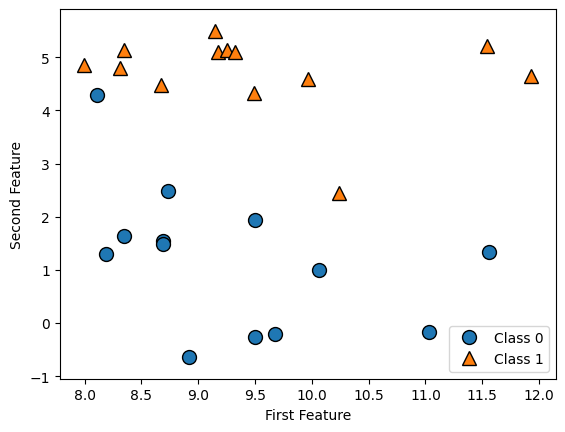

In [2]:
#Plot the dataset\
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print (' X.shape:{}'.format(X.shape) )

As we can see from X.shape, this dataset consists of 26 data points, with 2 features.


Text(0, 0.5, 'Target')

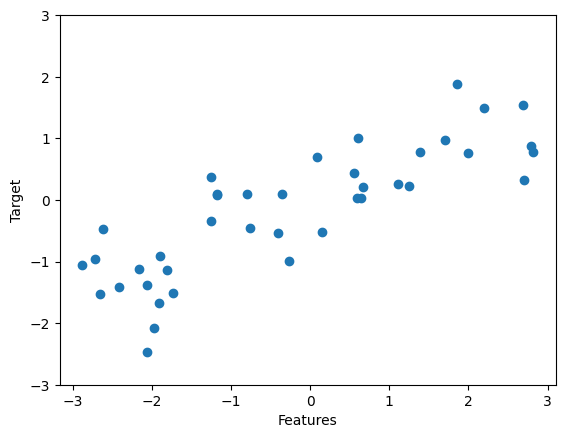

In [3]:
X , y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Features")
plt.ylabel("Target")


Plot of the wave dataset, with the x_axis showing the features and the y-axis showing the regression target


In [4]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [6]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


# K-Nearest Neighbors

Knn Algorithm


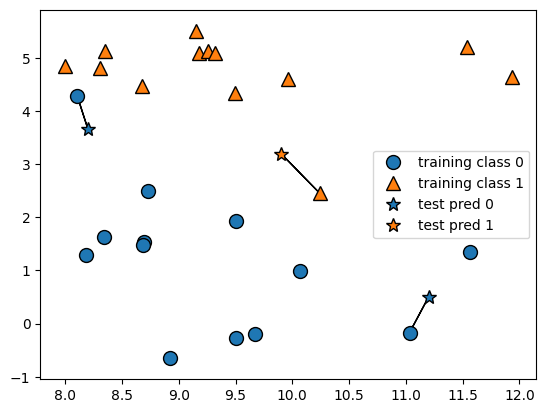

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Prediction made by the one-nearest-neighbor model on the forge dataset


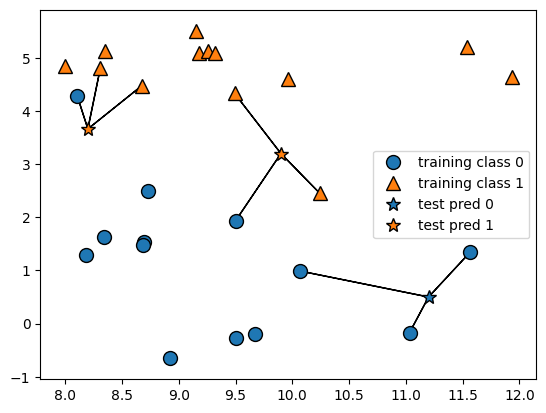

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Prediction made by the three-nearest-neighbor model on the forge dataset


Now let's look, we can apply the k-nearest-neighbor algorithm using scikit-learn.
First, we split our data into training and testing so we can evaluate generalization performance.


In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test= train_test_split( X, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier  # For KNeighborsClassifier this means storing the datasets, so we can compute neighbor during prediction
clf = KNeighborsClassifier(n_neighbors=3)

In [11]:
# Now let's fit the classifier using training set.
clf.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [12]:
print("Test set prediction :{}".format(clf.predict(X_test)))  # To make prediction on the test data, we call the predict method.

Test set prediction :[1 0 1 0 1 0 0]


In [13]:
# To evaluate how well our model generalizes, we can call the score method.......
print("Test accuracy :{:.2f}".format(clf.score(X_test, y_test))) 
# As you can see, my model scores 0.86 means model prediction accuracy is 86%.

Test accuracy :0.86


Analyzing the KNeighborsClassifier


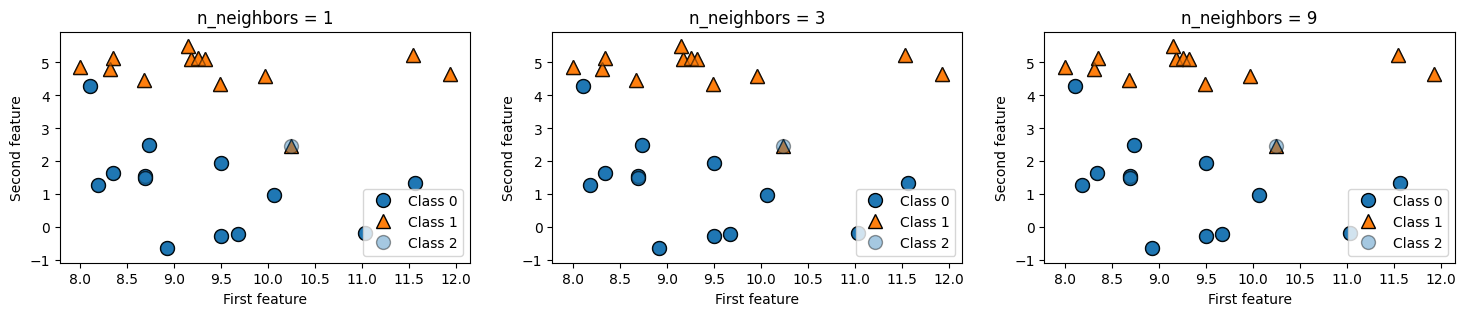

In [14]:
fig, axes = plt.subplots(1,3,figsize=(18,3))
for n_neighbors, ax in zip([1,3,9],axes):
    # The fit method returns the object self, so we can instantiate and fit in one line.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), ax=ax, alpha=0.4)
    ax.set_title("n_neighbors = {}".format(n_neighbors))
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend(["Class 0", "Class 1", "Class 2"], loc=4)

Decision boundaries created by the nearest neighbors model for different values of the n_neighbors....


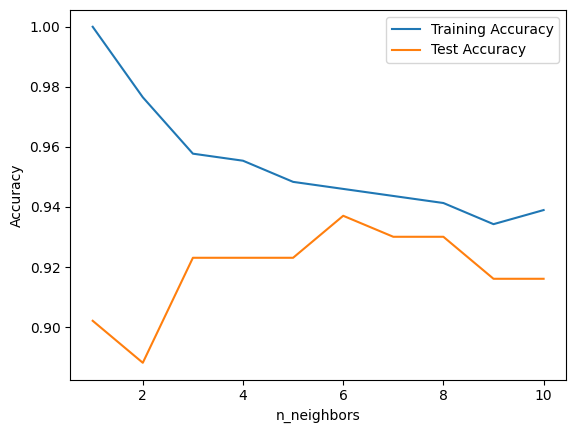

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Load the breast cancer dataset
cancer = load_breast_cancer()
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# Initialize empty lists to store training and test accuracy
training_accuracy = []
test_accuracy = []
# Define the range of neighbors to try
neighbors_settings = range(1, 11)
# Iterate over different values of n_neighbors
for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# Plot the training and test accuracy
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# K-Neighbors Regression


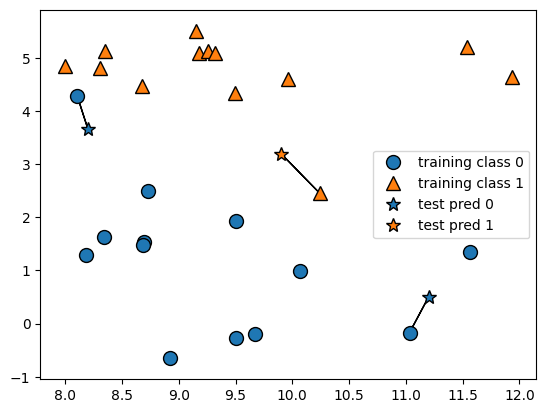

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1) 

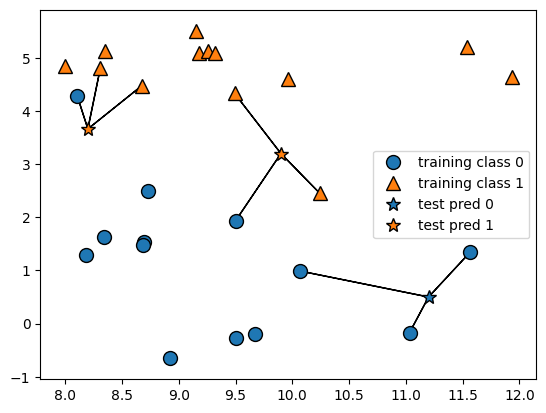

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors = 3) 

In [18]:
from sklearn.neighbors import KNeighborsRegressor

X , y = mglearn.datasets.make_wave(n_samples=40)

In [19]:
#Split the wave dataset into a training and a test set
X_train,X_test,y_train,y_test = train_test_split(X , y ,random_state=0)

In [20]:
reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
# now we can make predictions on the test dataset: 
print("Test set prediction :\n{}".format(reg.predict(X_test))) 

Test set prediction :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
print("Test set R^2:{:.2f}".format(reg.score(X_test, y_test))) 

Test set R^2:0.83


Analyzing KNeighborsRegressor **\*\***\*\***\*\***\_\_\_\_**\*\***\*\***\*\***


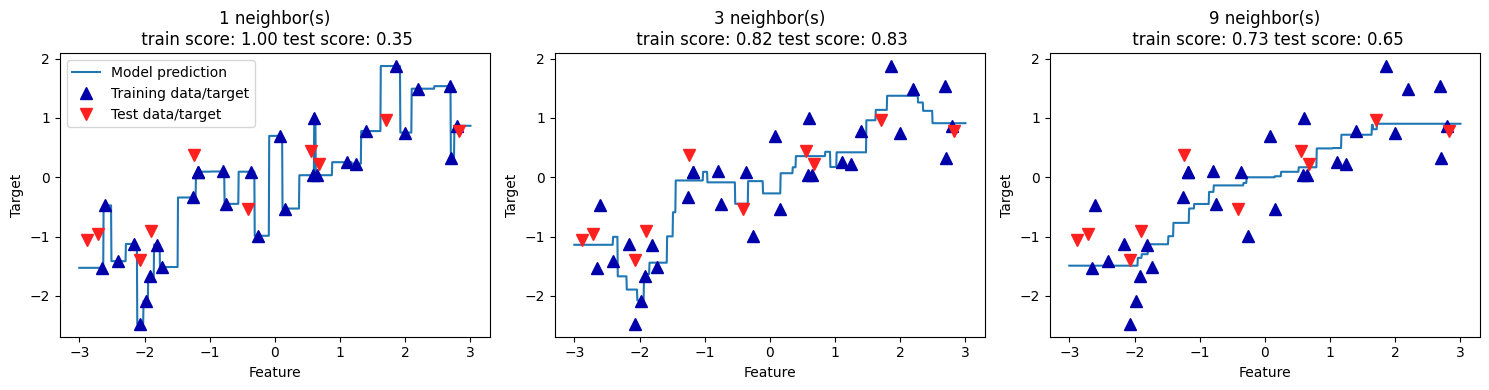

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import mglearn

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 
line = np.linspace(-3, 3, 1000).reshape(-1, 1) 

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) 
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")
plt.tight_layout()
plt.show()

Linear Models


w[0]: 0.393906  b: -0.031804


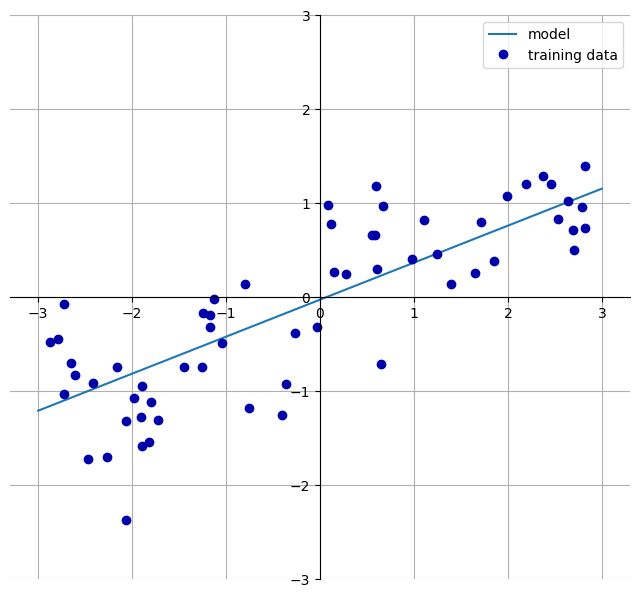

In [24]:
mglearn.plots.plot_linear_regression_wave() 

In [25]:
import mglearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
print("Lr coef",lr.coef_)
print("lr intercept",lr.intercept_)

Lr coef [0.39390555]
lr intercept -0.031804343026759746


In [27]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [28]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9520519609032729
0.6074721959665772


# Ridge Regression ---------------


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

In [30]:
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.885796658517094
0.7527683481744744


In [31]:
ridge10= Ridge(alpha=0.1).fit (X_train,y_train)

In [32]:
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.9282273685001985
0.7722067936479635


In [33]:
ridge01= Ridge(alpha=0.1).fit(X_train,y_train)

In [34]:
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.9282273685001985
0.7722067936479635


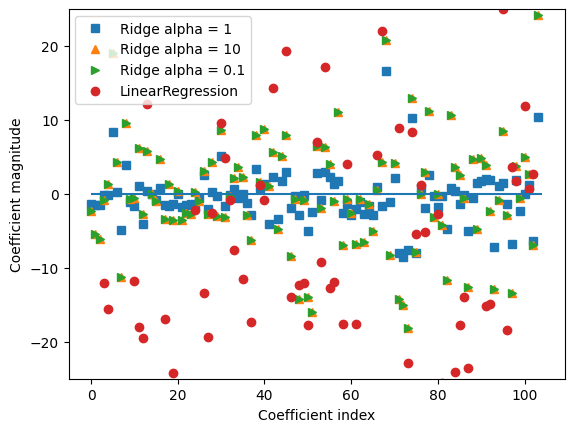

In [35]:
# Plotting the coefficients

plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, '>', label="Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25,25)
plt.legend()

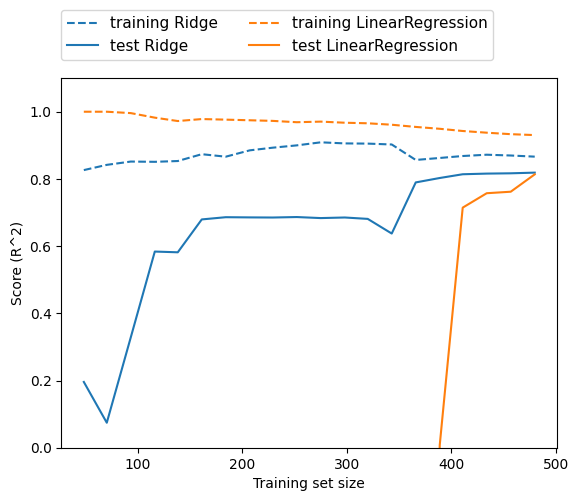

In [36]:
mglearn.plots.plot_ridge_n_samples()

# Linear Models for Classification


c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


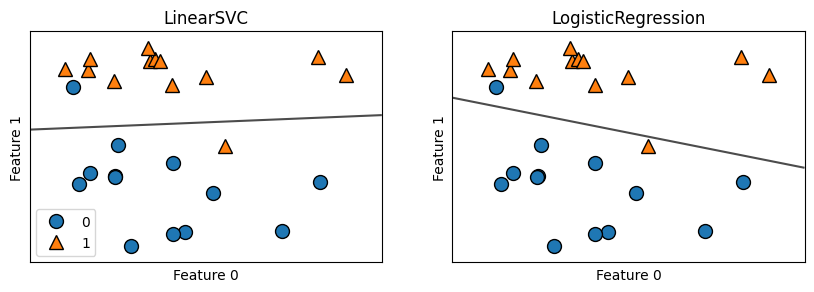

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()
plt.show()


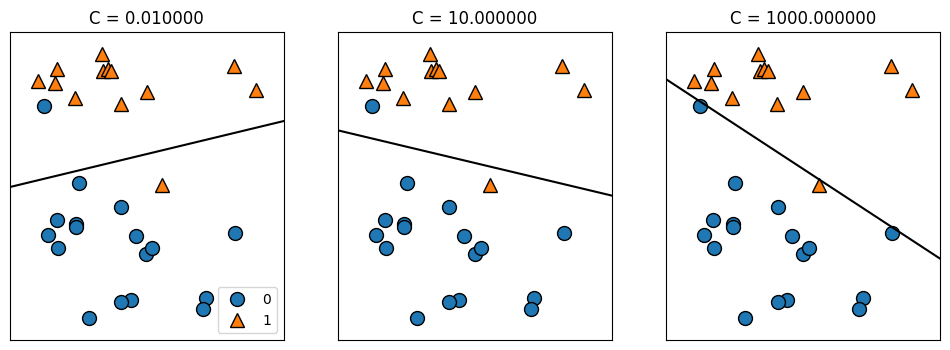

In [38]:
mglearn.plots.plot_linear_svc_regularization()

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train,y_train)

c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(logreg.score(X_train,y_train))

0.9553990610328639


In [41]:
print(logreg.score(X_test,y_test))

0.951048951048951


In [42]:
logreg100= LogisticRegression(C=100).fit(X_train,y_train)

c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print(logreg100.score(X_train,y_train))

0.9553990610328639


In [44]:
print(logreg100.score(X_test,y_test))

0.951048951048951


In [45]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)

c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print(logreg001.score(X_train,y_train))

0.9342723004694836


In [47]:
print(logreg001.score(X_test,y_test))

0.9300699300699301


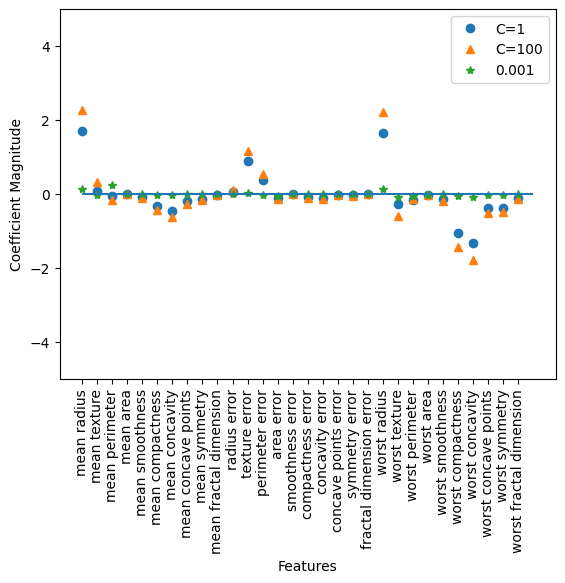

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)

plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.legend()

In [49]:
for C, marker in zip ([0.001, 1, 100],['o','^','*']):
    lr_l1= LogisticRegression(C=C, penalty="l2").fit(X_train,y_train)
    
    print("Training accuracy of l1 lorge with C = {:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    
    print("Training accuracy of l1 lorge with C = {:.3f}:{:.2f}".format(C,lr_l1.score(X_test,y_test)))

Training accuracy of l1 lorge with C = 0.001:0.95
Training accuracy of l1 lorge with C = 0.001:0.94
Training accuracy of l1 lorge with C = 1.000:0.96
Training accuracy of l1 lorge with C = 1.000:0.95
Training accuracy of l1 lorge with C = 100.000:0.96
Training accuracy of l1 lorge with C = 100.000:0.95


c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

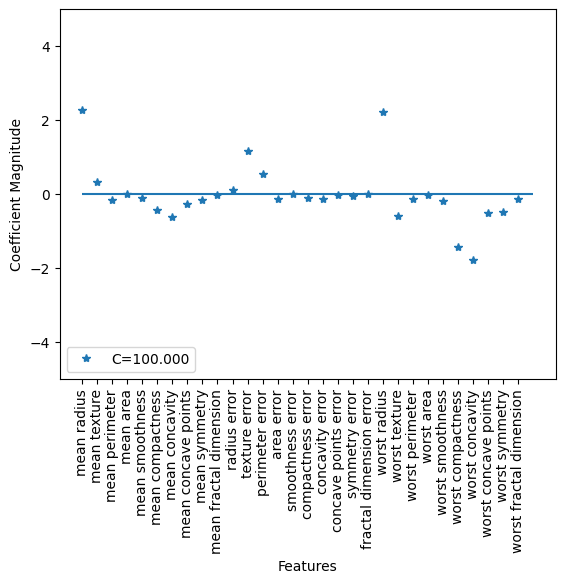

In [50]:
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.ylim(-5,5)
plt.legend(loc = 3)

# Linear Models for Classification


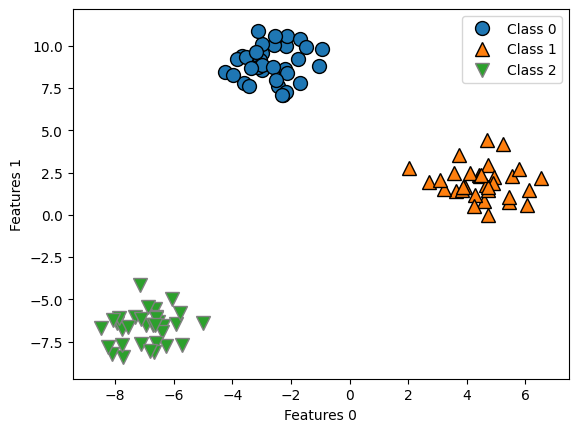

In [51]:
from sklearn.datasets import make_blobs
X , y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Features 0")
plt.ylabel("Features 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [52]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


c:\Users\princ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
mglearn.discrete_scatter(X[:,0], X[:, 1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef [0] + intercept)/ coef[1], c = color)
    plt.ylim(-10, 15)
    plt.xlim(-10,8)